# **library**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tdf1= pd.read_csv('/content/drive/MyDrive/a new RNA m6A/dataset/DBE-all t.csv')
tdf2= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/asdc-all t.csv")
tdf3= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/kmer-all t.csv")
tdf4= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/ncp-all t.csv")
tdf5= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/peip-all t.csv")



#train df
df1= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/DBE_all.csv")
df2= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/asdc-all.csv")
df3= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/kmer-all.csv")
df4= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/ncp-all.csv")
df5= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/peip-all.csv")


In [ ]:
class_distribution = df3['Target'].value_counts()
print(class_distribution)

0    3700
1    3700
Name: Target, dtype: int64


# merged and **feature**
LGBM, RFE,XGB,CHI-square

LGBM features

XGB

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load the DataFrame
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/train alll merged.csv")

# Separate features (X) and target (y)
X = df1.drop('Target', axis=1)
y = df1['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Get feature importance scores
feature_importances = xgb.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top-k features based on importance
k = 100  # You can set the number of top features you want to select
selected_features = feature_importance_df.head(k)['Feature']

# Filter the original DataFrame to include only selected features
selected_features_df = df1[selected_features]

# Add the "Target" column from the original DataFrame
selected_features_df['Target'] = df1['Target']

# Save the new DataFrame to a CSV file
selected_features_df.to_csv("/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv", index=False)


<ipython-input-5-a845714ac251>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['Target'] = df1['Target']


# CNN+ attention

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

# Build the CNN-Attention model
cnn_input = Input(shape=(100, 1))
cnn_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Dropout(0.2)(cnn_layer)
cnn_layer = Conv1D(filters=64, kernel_size=5, activation='relu')(cnn_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Dropout(0.5)(cnn_layer)
cnn_layer = Conv1D(filters=128, kernel_size=7, activation='relu')(cnn_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Dropout(0.5)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# Attention mechanism
attention_layer = Attention()([cnn_layer, cnn_layer])

# Concatenate CNN and attention outputs
combined = tf.keras.layers.concatenate([cnn_layer, attention_layer])

# Fully connected layers
combined = Dense(128, activation='relu')(combined)
output = Dense(1, activation='sigmoid')(combined)

# Compile the model
model = Model(inputs=cnn_input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', AUC()])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_classes)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
mcc = matthews_corrcoef(y_test, y_pred_classes)
kappa = cohen_kappa_score(y_test, y_pred_classes)
auc_score = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("MCC Score:", mcc)
print("Kappa Score:", kappa)
print("AUC Score:", auc_score)


Epoch 1/30
201/201 [==============================] - 4s 9ms/step - loss: 0.6395 - accuracy: 0.6298 - auc_22: 0.6836 - val_loss: 0.5911 - val_accuracy: 0.7102 - val_auc_22: 0.7812
Epoch 2/30
201/201 [==============================] - 2s 10ms/step - loss: 0.5999 - accuracy: 0.6805 - auc_22: 0.7418 - val_loss: 0.5685 - val_accuracy: 0.7400 - val_auc_22: 0.8015
Epoch 3/30
201/201 [==============================] - 2s 10ms/step - loss: 0.5809 - accuracy: 0.6909 - auc_22: 0.7621 - val_loss: 0.5853 - val_accuracy: 0.7394 - val_auc_22: 0.8127
Epoch 4/30
201/201 [==============================] - 2s 8ms/step - loss: 0.5692 - accuracy: 0.7054 - auc_22: 0.7769 - val_loss: 0.5466 - val_accuracy: 0.7531 - val_auc_22: 0.8260
Epoch 5/30
201/201 [==============================] - 1s 7ms/step - loss: 0.5537 - accuracy: 0.7240 - auc_22: 0.7915 - val_loss: 0.5246 - val_accuracy: 0.7568 - val_auc_22: 0.8367
Epoch 6/30
201/201 [==============================] - 1s 7ms/step - loss: 0.5388 - accuracy: 0.737

cv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X = X.reshape(X.shape[0], 100, 1)

# Initialize a 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
specificities = []
sensitivities = []
mccs = []
kappas = []
auc_scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the CNN-Attention model
    cnn_input = Input(shape=(100, 1))
    cnn_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)

    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Dropout(0.2)(cnn_layer)
    cnn_layer = Conv1D(filters=64, kernel_size=5, activation='relu')(cnn_layer)
    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = Conv1D(filters=128, kernel_size=7, activation='relu')(cnn_layer)
    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = Flatten()(cnn_layer)

    # Attention mechanism
    attention_layer = Attention()([cnn_layer, cnn_layer])

    # Concatenate CNN and attention outputs
    combined = tf.keras.layers.concatenate([cnn_layer, attention_layer])

    # Fully connected layers
    combined = Dense(128, activation='relu')(combined)
    output = Dense(1, activation='sigmoid')(combined)

    # Compile the model
    modelca = Model(inputs=cnn_input, outputs=output)
    modelca .compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', AUC()])

    # Train the model
    modelca .fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)



    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.round(y_pred)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    mcc = matthews_corrcoef(y_test, y_pred_classes)
    kappa = cohen_kappa_score(y_test, y_pred_classes)
    auc_score = roc_auc_score(y_test, y_pred)

    # Store metrics
    accuracies.append(accuracy)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    mccs.append(mcc)
    kappas.append(kappa)
    auc_scores.append(auc_score)

# Calculate mean and standard deviation for metrics
mean_accuracy = np.mean(accuracies)
mean_specificity = np.mean(specificities)
mean_sensitivity = np.mean(sensitivities)
mean_mcc = np.mean(mccs)
mean_kappa = np.mean(kappas)
mean_auc_score = np.mean(auc_scores)



# Print evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)
print("Mean MCC Score:", mean_mcc)
print("Mean Kappa Score:", mean_kappa)
print("Mean AUC Score:", mean_auc_score)



Epoch 1/30
227/227 [==============================] - 4s 7ms/step - loss: 0.6423 - accuracy: 0.6276 - auc_23: 0.6783
Epoch 2/30
227/227 [==============================] - 2s 7ms/step - loss: 0.5907 - accuracy: 0.6895 - auc_23: 0.7522
Epoch 3/30
227/227 [==============================] - 2s 7ms/step - loss: 0.5617 - accuracy: 0.7159 - auc_23: 0.7841
Epoch 4/30
227/227 [==============================] - 2s 7ms/step - loss: 0.5349 - accuracy: 0.7330 - auc_23: 0.8074
Epoch 5/30
227/227 [==============================] - 2s 7ms/step - loss: 0.5156 - accuracy: 0.7512 - auc_23: 0.8238
Epoch 6/30
227/227 [==============================] - 2s 9ms/step - loss: 0.4999 - accuracy: 0.7597 - auc_23: 0.8364
Epoch 7/30
227/227 [==============================] - 2s 10ms/step - loss: 0.4927 - accuracy: 0.7652 - auc_23: 0.8418
Epoch 8/30
227/227 [==============================] - 2s 8ms/step - loss: 0.4836 - accuracy: 0.7739 - auc_23: 0.8484
Epoch 9/30
227/227 [==============================] - 2s 7ms/st

# CNN-BILSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

# Build the CNN-BiLSTM model
cnn_input1 = Input(shape=(100, 1))
cnn_layer1 = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input1)
cnn_layer1 = MaxPooling1D(pool_size=2)(cnn_layer1)
cnn_layer1 = Dropout(0.2)(cnn_layer1)
cnn_layer1 = Conv1D(filters=64, kernel_size=5, activation='relu')(cnn_layer1)
cnn_layer1 = MaxPooling1D(pool_size=2)(cnn_layer1)
cnn_layer1 = Dropout(0.5)(cnn_layer1)

# Add BiLSTM layer
bilstm_layer1 = Bidirectional(LSTM(64, return_sequences=True))(cnn_layer1)
bilstm_layer1 = Dropout(0.2)(bilstm_layer1)
bilstm_layer1 = Bidirectional(LSTM(64))(bilstm_layer1)
bilstm_layer1 = Dropout(0.5)(bilstm_layer1)

# Fully connected layers
dense_layer1 = Dense(128, activation='relu')(bilstm_layer1)
output = Dense(1, activation='sigmoid')(dense_layer1)

# Compile the model
model1 = Model(inputs=cnn_input1, outputs=output)
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', AUC()])

# Train the model
model1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


# Predict on the test set
y_pred = model1.predict(X_test)
y_pred_classes = np.round(y_pred)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_classes)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
mcc = matthews_corrcoef(y_test, y_pred_classes)
kappa = cohen_kappa_score(y_test, y_pred_classes)
auc_score = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("MCC Score:", mcc)
print("Kappa Score:", kappa)
print("AUC Score:", auc_score)


Epoch 1/30
201/201 [==============================] - 15s 30ms/step - loss: 0.6665 - accuracy: 0.5815 - auc_34: 0.6256 - val_loss: 0.5949 - val_accuracy: 0.6897 - val_auc_34: 0.7527
Epoch 2/30
201/201 [==============================] - 3s 17ms/step - loss: 0.5998 - accuracy: 0.6803 - auc_34: 0.7428 - val_loss: 0.5767 - val_accuracy: 0.6996 - val_auc_34: 0.7909
Epoch 3/30
201/201 [==============================] - 3s 17ms/step - loss: 0.5887 - accuracy: 0.6895 - auc_34: 0.7542 - val_loss: 0.5672 - val_accuracy: 0.7015 - val_auc_34: 0.7977
Epoch 4/30
201/201 [==============================] - 5s 23ms/step - loss: 0.5735 - accuracy: 0.7006 - auc_34: 0.7709 - val_loss: 0.5429 - val_accuracy: 0.7313 - val_auc_34: 0.8055
Epoch 5/30
201/201 [==============================] - 3s 16ms/step - loss: 0.5651 - accuracy: 0.7066 - auc_34: 0.7783 - val_loss: 0.5295 - val_accuracy: 0.7369 - val_auc_34: 0.8131
Epoch 6/30
201/201 [==============================] - 3s 15ms/step - loss: 0.5590 - accuracy: 

51/51 [==============================] - 0s 8ms/step


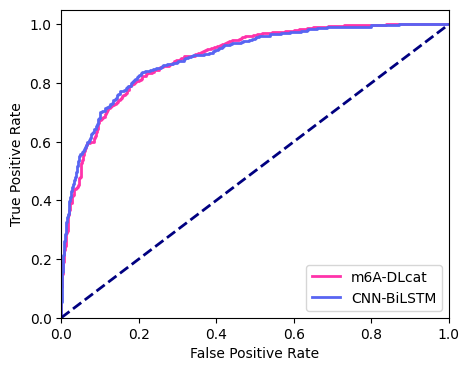

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

# Build the CNN-Attention model
# ... (rest of your model architecture)

# Compile the model
# ...

# Train the model
# ...

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Calculate evaluation metrics
# ... (your existing code to calculate metrics)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Build the CNN-BiLSTM model
# ... (similar to the first model architecture)

# Compile the model
# ...

# Train the model
# ...

# Predict on the test set for the second model
y_pred1 = model1.predict(X_test)
y_pred1_classes = np.round(y_pred1)

# Calculate the ROC curve for the second model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Plot ROC curves in a single figure
plt.figure(figsize=(5, 4))

# Plot ROC curve for the first model
plt.plot(fpr, tpr, color='#FF33AA', lw=2, label=f'm6A-DLcat')

# Plot ROC curve for the second model
plt.plot(fpr1, tpr1, color='#5865F2', lw=2, label=f'CNN-BiLSTM')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(' xGB-in-roc.png', dpi=300)
# Show the plot
plt.show()


CV

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X = X.reshape(X.shape[0], 100, 1)

# Initialize a 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
specificities = []
sensitivities = []
mccs = []
kappas = []
auc_scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Build the CNN-BiLSTM model
    cnn_input1cv = Input(shape=(100, 1))
    cnn_layer1cv = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input1cv)
    cnn_layer1cv = MaxPooling1D(pool_size=2)(cnn_layer1cv)
    cnn_layer1cv = Dropout(0.2)(cnn_layer1cv)
    cnn_layer1cv = Conv1D(filters=64, kernel_size=5, activation='relu')(cnn_layer1cv)
    cnn_layer1cv = MaxPooling1D(pool_size=2)(cnn_layer1cv)
    cnn_layer1cv = Dropout(0.5)(cnn_layer1cv)

    # Add BiLSTM layer
    bilstm_layer1cv = Bidirectional(LSTM(64, return_sequences=True))(cnn_layer1cv)
    bilstm_layer1cv = Dropout(0.2)(bilstm_layer1cv)
    bilstm_layer1cv = Bidirectional(LSTM(64))(bilstm_layer1cv)
    bilstm_layer1cv = Dropout(0.5)(bilstm_layer1cv)

    # Fully connected layers
    dense_layer = Dense(128, activation='relu')(bilstm_layer1cv)
    output = Dense(1, activation='sigmoid')(dense_layer)

    # Compile the model
    model1cv = Model(inputs=cnn_input1cv, outputs=output)
    model1cv.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', AUC()])

    # Train the model
    model1cv.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

    # Predict on the test set
    y_pred = model1cv.predict(X_test)
    y_pred_classes1 = np.round(y_pred)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred_classes1)
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    mcc = matthews_corrcoef(y_test, y_pred_classes1)
    kappa = cohen_kappa_score(y_test, y_pred_classes1)
    auc_score = roc_auc_score(y_test, y_pred)

    # Store metrics
    accuracies.append(accuracy)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    mccs.append(mcc)
    kappas.append(kappa)
    auc_scores.append(auc_score)

# Calculate mean and standard deviation for metrics
mean_accuracy = np.mean(accuracies)
mean_specificity = np.mean(specificities)
mean_sensitivity = np.mean(sensitivities)
mean_mcc = np.mean(mccs)
mean_kappa = np.mean(kappas)
mean_auc_score = np.mean(auc_scores)


# Print evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Specificity:", mean_specificity)
print("Mean Sensitivity:", mean_sensitivity)
print("Mean MCC Score:", mean_mcc)
print("Mean Kappa Score:", mean_kappa)
print("Mean AUC Score:", mean_auc_score)



Epoch 1/30
227/227 [==============================] - 19s 21ms/step - loss: 0.6645 - accuracy: 0.5905 - auc_12: 0.6347
Epoch 2/30
227/227 [==============================] - 4s 17ms/step - loss: 0.6018 - accuracy: 0.6708 - auc_12: 0.7383
Epoch 3/30
227/227 [==============================] - 3s 15ms/step - loss: 0.5839 - accuracy: 0.6944 - auc_12: 0.7597
Epoch 4/30
227/227 [==============================] - 3s 15ms/step - loss: 0.5748 - accuracy: 0.6982 - auc_12: 0.7687
Epoch 5/30
227/227 [==============================] - 5s 22ms/step - loss: 0.5732 - accuracy: 0.7051 - auc_12: 0.7711
Epoch 6/30
227/227 [==============================] - 3s 15ms/step - loss: 0.5689 - accuracy: 0.7087 - auc_12: 0.7767
Epoch 7/30
227/227 [==============================] - 4s 15ms/step - loss: 0.5598 - accuracy: 0.7159 - auc_12: 0.7849
Epoch 8/30
227/227 [==============================] - 4s 17ms/step - loss: 0.5580 - accuracy: 0.7172 - auc_12: 0.7863
Epoch 9/30
227/227 [==============================] - 5

51/51 [==============================] - 0s 6ms/step


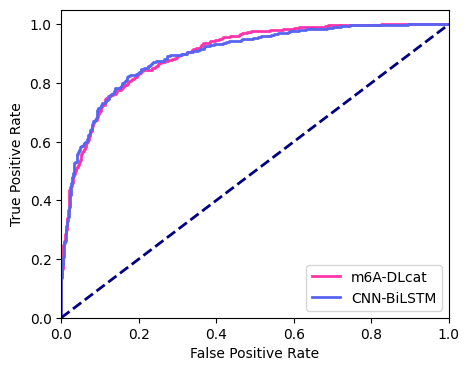

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt

# Load your dataset
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)

# Assuming your target column is named 'target'
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the Conv1D model (assuming input shape is (400,))
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

# Build the CNN-Attention model
# ... (rest of your model architecture)

# Compile the model
# ...

# Train the model
# ...

# Predict on the test set
y_pred = modelca.predict(X_test)
y_pred_classes = np.round(y_pred)

# Calculate evaluation metrics
# ... (your existing code to calculate metrics)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Build the CNN-BiLSTM model
# ... (similar to the first model architecture)

# Compile the model
# ...

# Train the model
# ...

# Predict on the test set for the second model
y_pred1 = model1cv.predict(X_test)
y_pred1_classes = np.round(y_pred1)

# Calculate the ROC curve for the second model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Plot ROC curves in a single figure
plt.figure(figsize=(5, 4))

# Plot ROC curve for the first model
plt.plot(fpr, tpr, color='#FF33AA', lw=2, label=f'm6A-DLcat')

# Plot ROC curve for the second model
plt.plot(fpr1, tpr1, color='#5865F2', lw=2, label=f'CNN-BiLSTM')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(' XGBDL-K-roc.png', dpi=300)
# Show the plot
plt.show()


# MODEL ML LGBML FEATURE

In [ ]:
lr_params = {
    'random_state': 10,
    'penalty': 'l2',
    'solver': 'lbfgs',
    'multi_class': 'ovr',
    'C': 1.0,
    'max_iter': 100
}
lr= lr = LogisticRegression(**lr_params)
rf_params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_features': 'sqrt',
    'random_state': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
}
rf = RandomForestClassifier(**rf_params)
svc = SVC(kernel='poly', degree = 3)
knn=KNeighborsClassifier(n_neighbors=10)
#svm = svm.SVC(kernel='linear', C=1)
ridge=RidgeClassifier()
ada=AdaBoostClassifier()
sgd=SGDClassifier()
ex=ExtraTreesClassifier(n_estimators=100, random_state=10)
la=LinearDiscriminantAnalysis()
lsv=LinearSVC()
dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=10)
mlp= MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')
knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
lgbm_params = {
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'min_child_samples': 20,
    'subsample_for_bin': 200000,
    'min_split_gain': 0.0,
    'objective': 'binary'
}
lgbm = LGBMClassifier(**lgbm_params)

xgb_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 1.0,
    'gamma': 0.0,
    'min_child_weight': 1,
    'objective': 'binary:logistic'
}
xgb = XGBClassifier(**xgb_params)

In [ ]:
#VOTING (HARD)
from sklearn.ensemble import  VotingClassifier
vth1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='soft')
vth2 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')
vth3 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='soft')
vth4 = VotingClassifier(estimators=[ ('lgbm', lgbm),('rf',rf)], voting='hard')
vth5 = VotingClassifier(estimators=[ ('lgbm', lgbm),('knn',knn)], voting='hard')
vth6 = VotingClassifier(estimators=[ ('lgbm', lgbm),('dt',dt)], voting='hard')
vth7 = VotingClassifier(estimators=[ ('lgbm', lgbm),('mlp',mlp)], voting='hard')
vth8 = VotingClassifier(estimators=[ ('dt', dt),('xgb', xgb)], voting='hard')
vth9 = VotingClassifier(estimators=[ ('dt', dt),('mlp', mlp),('xgb', xgb),('lgbm', lgbm),('ex', ex),('knn', knn)], voting='hard')
vth10 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='hard')
vth11 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vth12 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='hard')
vth13 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm),('rf',rf)], voting='hard')


In [ ]:
#STACK
from sklearn.ensemble import StackingClassifier
stk1 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=LogisticRegression())
stk2 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=LogisticRegression())
stk3 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=LogisticRegression())
stk4 = StackingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk5 = StackingClassifier(estimators=[('xgb', xgb), ('mlp', mlp), ('dt', dt),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression())
stk7 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=RandomForestClassifier())
stk8 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=RandomForestClassifier())
stk9 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=RandomForestClassifier())
stk10 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb), ('rf', rf), ('lr', lr), ('mlp', mlp),], final_estimator=LogisticRegression())
stk11 = StackingClassifier(estimators=[('dt',dt),('knn', knn), ('rf', rf), ('mlp', mlp), ('lgbm', lgbm),], final_estimator=LogisticRegression())
stk12 = StackingClassifier(estimators=[('xgb',rf),('knn', knn), ('rf', rf), ('dt', dt), ('ex', ex),], final_estimator=LogisticRegression())

In [ ]:
model_list = [ex,ada,stk1]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv")

In [ ]:
X1 = df.iloc[:, :-1]
y1 = df.iloc[:, -1]

In [ ]:
y1.tail(5)

8035    0
8036    0
8037    0
8038    0
8039    0
Name: Target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 142)

# train test-

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, classification_report
from sklearn.metrics import confusion_matrix

# Assuming you have already defined your model_list, X1, and y1

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=142)

# Initialize dictionaries to store results
results = []

for model in model_list:
    # Assuming you have already initialized and fitted the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Assuming your model's name is stored as model.__class__.__name__
    model_name = model.__class__.__name__

    # Store results in a dictionary
    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "MCC": mcc,
        "Kappa": kappa,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("XGB_train_test.csv", index=False)



[LightGBM] [Info] Number of positive: 3211, number of negative: 3221
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 6432, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499223 -> initscore=-0.003109
[LightGBM] [Info] Start training from score -0.003109
[LightGBM] [Info] Number of positive: 2569, number of negative: 2576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 5145, number of used features: 100
[LightGBM] [Info

# CV

# ROC CURVE DL + ML

Evaluating ExtraTreesClassifier...
Evaluating AdaBoostClassifier...
Evaluating StackingClassifier...


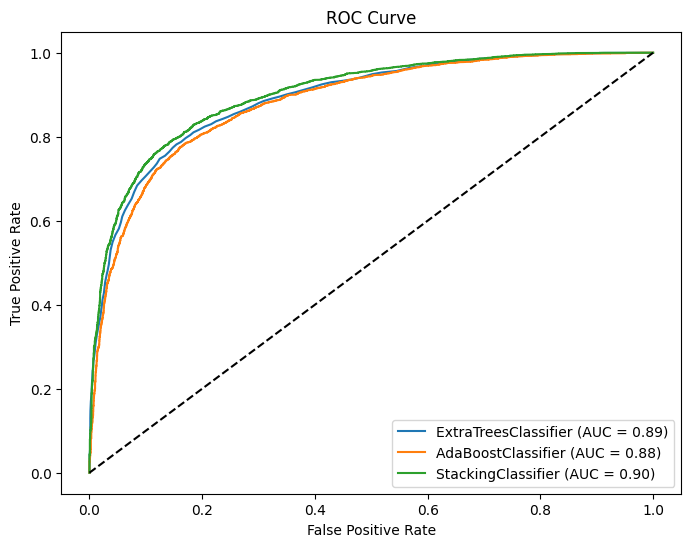

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load your data
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Initialize KFold cross-validator
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize a list to store results
results = []

# Initialize lists to store FPR and TPR for each model
fpr_list = []
tpr_list = []
auc_list = []

for model in model_list:
    # Initialize and fit the model
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")

    # Perform cross-validation and get predicted labels
    y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1, method='predict_proba')[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred.round())
    mcc = matthews_corrcoef(y, y_pred.round())
    kappa = cohen_kappa_score(y, y_pred.round())

    tn, fp, fn, tp = confusion_matrix(y, y_pred.round()).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    # Append FPR, TPR, and AUC to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

    # Store results in a dictionary
    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "MCC": mcc,
        "Kappa": kappa,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("XGB-K.csv", index=False)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for i in range(len(model_list)):
    plt.plot(fpr_list[i], tpr_list[i], label=f"{model_list[i].__class__.__name__} (AUC = {auc_list[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 3211, number of negative: 3221
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 6432, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499223 -> initscore=-0.003109
[LightGBM] [Info] Start training from score -0.003109
[LightGBM] [Info] Number of positive: 2569, number of negative: 2576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 5145, number of used features: 100
[LightGBM] [Info

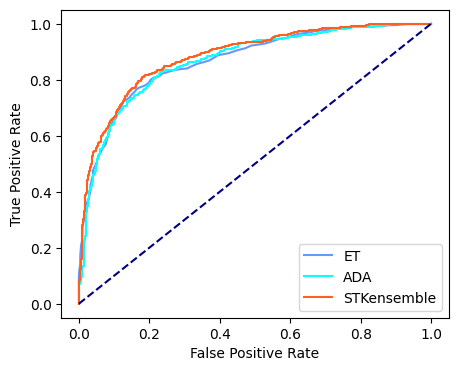

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already defined your model_list, X1, and y1
model_names = ["ET", "ADA", "STKensemble"]
colors = ["#6698FF", "#0AFFFF", "#FF5F1F"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=142)

# Initialize lists to store FPR and TPR for each model
fpr_list = []
tpr_list = []
auc_list = []

# Calculate FPR and TPR for ROC curve for each model
for i, model in enumerate(model_list):
    # Assuming you have already initialized and fitted the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict_proba(x_test)[:, 1]

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append FPR, TPR, and AUC to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Plot ROC curves for each model
plt.figure(figsize=(5, 4))
for i in range(len(model_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], label=f"{model_names[i]}")
plt.plot([0, 1], [0, 1], linestyle="--", color="navy")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="lower right")
plt.savefig(' XGB-MLK-roc.png', dpi=300)
plt.show()

Evaluating ET...
Evaluating ADA...
Evaluating STKensemble...
[LightGBM] [Info] Number of positive: 3601, number of negative: 3635
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 7236, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497651 -> initscore=-0.009398
[LightGBM] [Info] Start training from score -0.009398
[LightGBM] [Info] Number of positive: 2880, number of negative: 2908
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the t

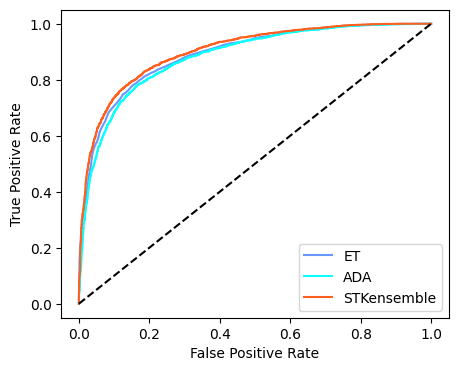

In [ ]:
# Load your data
data_path = '/content/drive/MyDrive/a new RNA m6A/dataset/main data for merged/100-XGB-Features.csv'
data = pd.read_csv(data_path)
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Initialize KFold cross-validator
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize a list to store results
results = []

# Initialize lists to store FPR and TPR for each model
fpr_list = []
tpr_list = []
auc_list = []

# Define model names and colors
model_names = ["ET", "ADA", "STKensemble"]
colors = ["#6698FF", "#0AFFFF", "#FF5F1F"]

model_list = [ex,ada,stk1]

plt.figure(figsize=(5, 4)) # create a figure to plot all curves

for idx, model in enumerate(model_list):
    # Initialize and fit the model
    model_name = model_names[idx]
    color = colors[idx]
    print(f"Evaluating {model_name}...")

    # Fit the model
    y_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
    fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
    auc = roc_auc_score(y, y_pred[:, 1])

    # Append results to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, label=model_name, color=color)

# Plot the legend for all curves
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="lower right")
plt.savefig(' XGB-MLKK-roc.png', dpi=300)
plt.show()

In [ ]:
ET	81.26	80.40	82.11	62.52	62.51	87.00
ADA	80.72	78.56	82.89	61.50	61.44	87.00
STKensemble	82.08	80.95	83.21	64.17	64.15	88.00
CNN-BiLSTM	79.90	76.75	83.05	59.99	59.81	87.90
m6A-DLcat	87.76	84.42	91.09	75.72	75.52	95.26

